# **CSE 6520: Final Project**

## **Customer Personality Analysis**

**Dataset:**

The Customer Personality Analysis dataset presents a comprehensive collection of attributes that provide insights into the diverse characteristics and behaviors of a company's customer base. In the realm of data-driven decision-making, understanding customer profiles is crucial for businesses seeking to optimize their marketing strategies, tailor products, and enhance overall customer experiences.

> The data encompasses various attributes divided into four key categories:

**People:**

- ID: Customer's unique identifier.
- Year_Birth: Customer's birth year.
- Education: Customer's education level.
- Marital_Status: Customer's marital status.
- Income: Customer's yearly household income.
- Kidhome: Number of children in the customer's household.
- Teenhome: Number of teenagers in the customer's household.
- Dt_Customer: Date of customer's enrollment with the company.
- Recency: Number of days since the customer's last purchase.
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise.

**Products:**

- MntWines: Amount spent on wine in the last 2 years.
- MntFruits: Amount spent on fruits in the last 2 years.
- MntMeatProducts: Amount spent on meat in the last 2 years.
- MntFishProducts: Amount spent on fish in the last 2 years.
- MntSweetProducts: Amount spent on sweets in the last 2 years.
- MntGoldProds: Amount spent on gold in the last 2 years.

**Promotion:**

- NumDealsPurchases: Number of purchases made with a discount.
- AcceptedCmp1-5: 1 if the customer accepted the offer in the corresponding campaign, 0 otherwise.
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise.

**Place:**

- NumWebPurchases: Number of purchases made through the company’s website.
- NumCatalogPurchases: Number of purchases made using a catalogue.
- NumStorePurchases: Number of purchases made directly in stores.
- NumWebVisitsMonth: Number of visits to the company’s website in the last month.

**Target:**

The primary objective is to perform clustering on this dataset to summarize customer segments effectively. By categorizing customers into distinct segments based on their attributes and behaviors, businesses can gain valuable insights to tailor marketing strategies, optimize resource allocation, and enhance overall customer satisfaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
df.shape

(2240, 29)

## **Data Cleaning**

Checking null values

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

The "Income" field contains 24 null values. One possible approach to address this is by removing the records associated with these null values.

In [7]:
#To remove the NA values
df = df.dropna()

In [8]:
df.isna().sum()
print("The total number of records after removing the rows with missing values are:", len(df))

The total number of records after removing the rows with missing values are: 2216


In [9]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Now, there is no missing value of NaN in record.

In [10]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

As you can see above, "Z_CostContact" and "Z_Revenue" have only 1 unique value, that means they have the same value only. So we can drop those columns.

In [12]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

### **Transforming the data**

In [13]:
df['Age'] = 2023 - df['Year_Birth']

I think age will help us understand more. Creating a new column "Age" which calculates age of the customer from birth year.

In [14]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Unique categories present in the Education: Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


<Figure size 800x800 with 0 Axes>

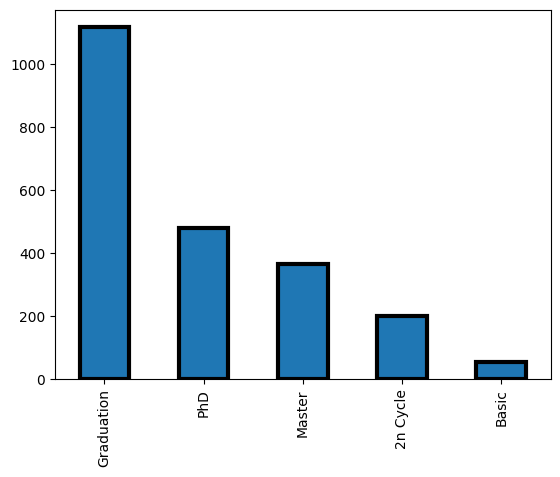

<Figure size 800x800 with 0 Axes>

In [15]:
print("Unique categories present in the Education:",df["Education"].value_counts())
df['Education'].value_counts().plot(kind='bar',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(8,8))

Things concluded from the above figure,


*   50.86% of the customers have completed graduation.
*   21.93% of the customers have completed PhD.
*   16.70% of the customers have completed Master.
*   9.16% of the customers have completed 2n Cycle.
*   2.44% of the customers have completed Basic education.

In [16]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Unique categories present in the Marital_Status: Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


<Figure size 800x800 with 0 Axes>

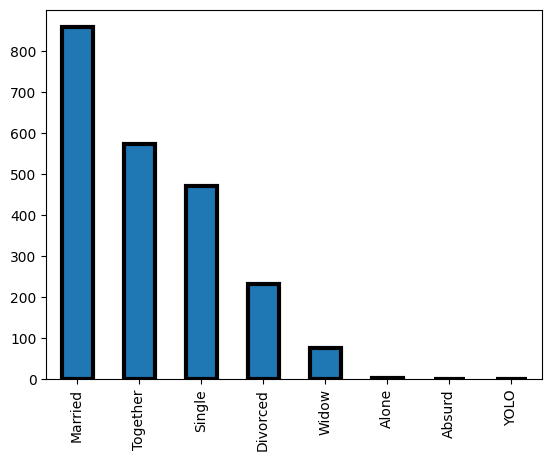

<Figure size 800x800 with 0 Axes>

In [17]:
print("Unique categories present in the Marital_Status:",df["Marital_Status"].value_counts())
df['Marital_Status'].value_counts().plot(kind='bar',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(8,8))

Things concluded from the above figure,


*   38.67% of the customers are married.
*   25.86% of the customers are together.
*   21.25% of the customers are single.
*   10.47% of the customers are divorced.
*   3.43% of the customers are widow.
*   0.14% of the customers are alone.
*   0.09% of the customers are absurd.
*   0.09% of the customers are YOLO.

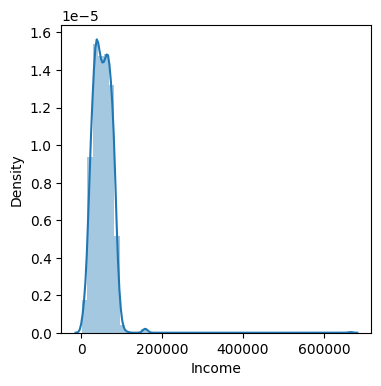

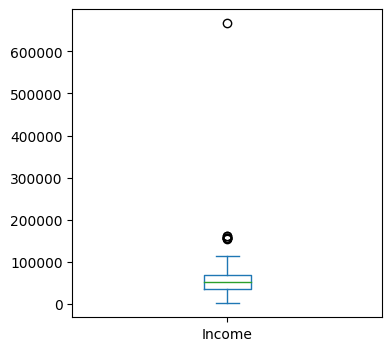

In [18]:
plt.figure(figsize=(4,4))
sns.distplot(df["Income"])
plt.show()
df["Income"].plot.box(figsize=(4,4))
plt.show()

In [19]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Creating a new column with name "Children" which combines and store the value of number of kids at home and number of teens at home.

Unique categories present in the Children: 1    1117
0     633
2     416
3      50
Name: Children, dtype: int64


<Figure size 200x200 with 0 Axes>

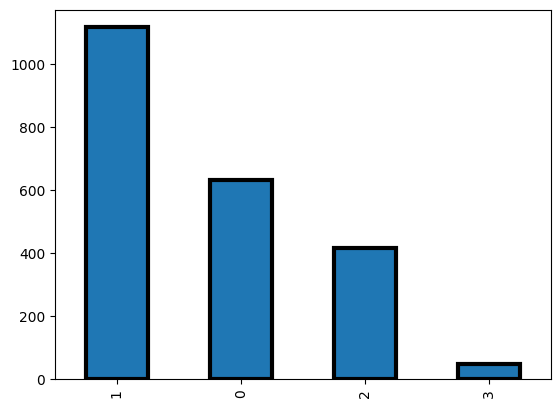

<Figure size 200x200 with 0 Axes>

In [20]:
print("Unique categories present in the Children:",df["Children"].value_counts())
df['Children'].value_counts().plot(kind='bar',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(2,2))

Things concluded from the above figure,

* 50.40% of the customers have 1 child.
* 28.56% of the customers have no children.
* 18.77% of the customers have 2 children.
* 2.26% of the customers have 3 children.

In [21]:
import pandas as pd

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

# Find the newest and oldest customer enrollment dates
newest_enrollment_date = df["Dt_Customer"].max()
oldest_enrollment_date = df["Dt_Customer"].min()

print("The newest customer's enrollment date in the records:", newest_enrollment_date)
print("The oldest customer's enrollment date in the records:", oldest_enrollment_date)

# Calculate the duration of enrollment for each customer in months
df["Customer_For_Months"] = ((newest_enrollment_date - df["Dt_Customer"]).dt.days / 30).astype(int)
df["Customer_For_Months"] = pd.to_numeric(df["Customer_For_Months"], errors="coerce")

The newest customer's enrollment date in the records: 2014-12-06 00:00:00
The oldest customer's enrollment date in the records: 2012-01-08 00:00:00


In [22]:
df['Complain'].unique()

array([0, 1])

Unique categories present in the Complain: 0    2195
1      21
Name: Complain, dtype: int64


<Figure size 800x800 with 0 Axes>

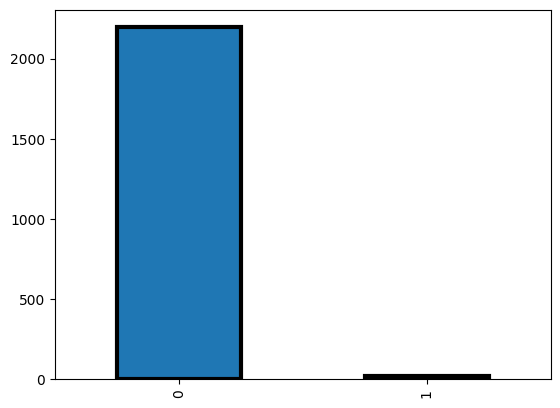

<Figure size 800x800 with 0 Axes>

In [23]:
print("Unique categories present in the Complain:",df["Complain"].value_counts())
df['Complain'].value_counts().plot(kind='bar',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(8,8))

Things concluded from the above figure,

* 99.05% of the customers have made 0 complaints.
* 00.95% of the customers have made 1 complaint.

In [24]:
df['Amount_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

Made a single column called "Amount_Spent" to reduce the number of dimensions.

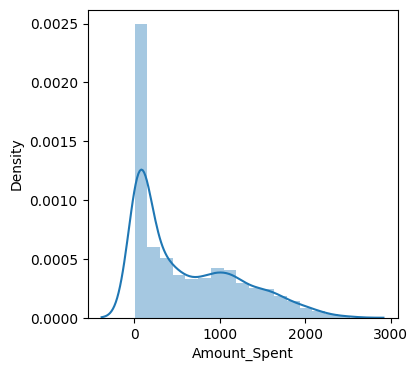

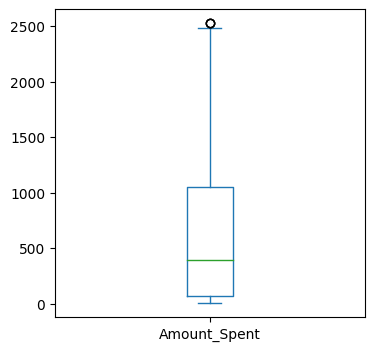

In [25]:
plt.figure(figsize=(4,4))
sns.distplot(df["Amount_Spent"])
plt.show()
df["Amount_Spent"].plot.box(figsize=(4,4))
plt.show()

In [26]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

Made a single column called "TotalAcceptedCmp" to reduce the number of dimensions.

Unique categories present in the TotalAcceptedCmp: 0    1757
1     323
2      81
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64


<Figure size 200x200 with 0 Axes>

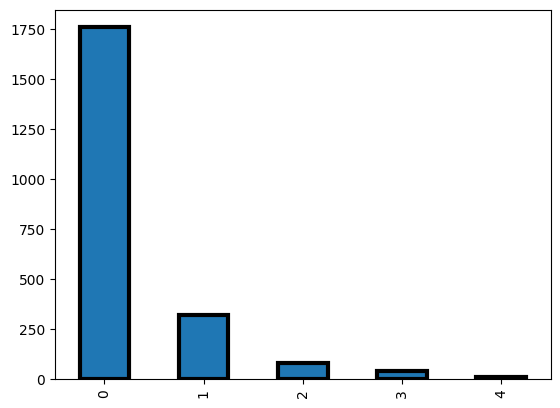

<Figure size 200x200 with 0 Axes>

In [27]:
print("Unique categories present in the TotalAcceptedCmp:",df["TotalAcceptedCmp"].value_counts())
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',edgecolor = "black",linewidth = 3)
plt.figure(figsize=(2,2))

Things concluded from the above figure,

* 79.29% of the customers have not accepeted the offer in any campaign.
* 14.57% of the customers have accepted the offer in one of the campaign.
* 3.65% of the customers have accepted the offer in any 2 of the campaign.
* 1.98% of the customers have accepted the offer in any 3 of the campaign.
* 0.50% of the customers have accepted the offer in any 4 of the campaign.

In [28]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

Made a single column called "TotalAcceptedCmp" reduce the number of dimensions.

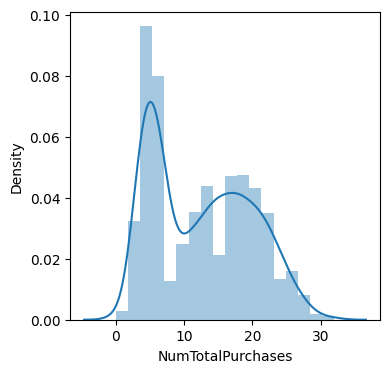

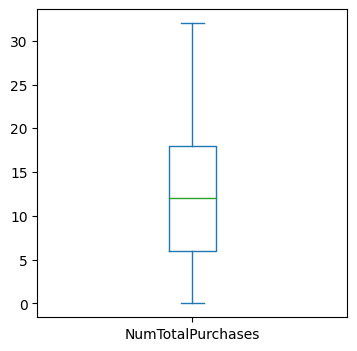

In [29]:
plt.figure(figsize=(4,4))
sns.distplot(df["NumTotalPurchases"])
plt.show()
df["NumTotalPurchases"].plot.box(figsize=(4,4))
plt.show()

In [30]:
df_rfm = df.copy()
df3 = df.copy()

In [31]:
col_del = ["ID","Dt_Customer","Year_Birth","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

Dropping the columns that are not needed.

In [32]:
df.head(6)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Customer_For_Months,Amount_Spent,TotalAcceptedCmp,NumTotalPurchases
0,Graduation,Single,58138.0,58,3,7,0,1,66,0,32,1617,0,22
1,Graduation,Single,46344.0,38,2,5,0,0,69,2,4,27,0,4
2,Graduation,Together,71613.0,26,1,4,0,0,58,0,15,776,0,20
3,Graduation,Together,26646.0,26,2,6,0,0,39,1,2,53,0,6
4,PhD,Married,58293.0,94,5,5,0,0,42,1,10,422,0,14
5,Master,Together,62513.0,16,2,6,0,0,56,1,15,716,0,20


In [33]:
x = df.columns
for i in x:
     print(i)

Education
Marital_Status
Income
Recency
NumDealsPurchases
NumWebVisitsMonth
Complain
Response
Age
Children
Customer_For_Months
Amount_Spent
TotalAcceptedCmp
NumTotalPurchases


In [34]:
df2 = df.copy()

### **Outliers Detection**

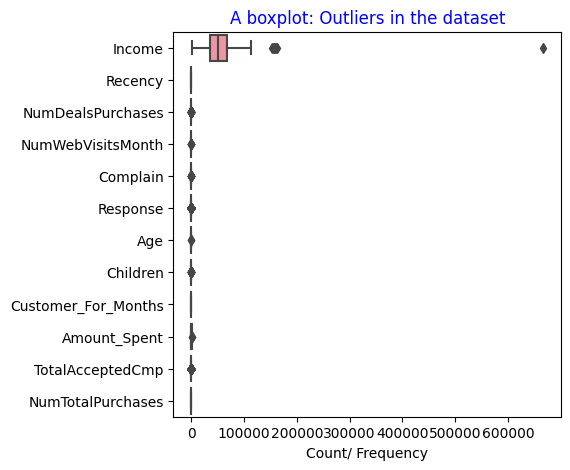

In [35]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

In [36]:
from math import sqrt
# Removing the Outliers
q3 = df.quantile(0.75)
q1 = df.quantile(0.25)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df = df[~( (df < lower_range)|(df > upper_range) ).any(axis=1)]

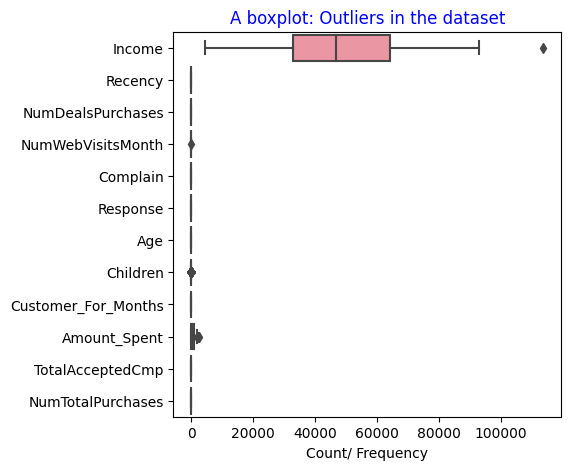

In [37]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

### **Label Encoding**

In [38]:
le = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        le.append(i)

print(le)

['Education', 'Marital_Status']


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [40]:
lbl_encode = LabelEncoder()
for i in le:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [41]:
df.head(6)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Customer_For_Months,Amount_Spent,TotalAcceptedCmp,NumTotalPurchases
1,2,4,46344.0,38,2,5,0,0,69,2,4,27,0,4
2,2,5,71613.0,26,1,4,0,0,58,0,15,776,0,20
3,2,5,26646.0,26,2,6,0,0,39,1,2,53,0,6
4,4,3,58293.0,94,5,5,0,0,42,1,10,422,0,14
5,3,5,62513.0,16,2,6,0,0,56,1,15,716,0,20
6,2,2,55635.0,34,4,6,0,0,52,1,25,590,0,17


# **RFM Analysis**

---


1. Recency (R): This measures how recently a customer has made a purchase. Customers who have made a purchase more recently are considered more valuable.

2. Frequency (F): This measures how often a customer makes a purchase. Customers who make frequent purchases are often more engaged and loyal.

3. Monetary Value (M): This measures the total monetary value of a customer's purchases. Customers who spend more money are generally considered more valuable.

In [42]:
col_del = ["Dt_Customer","Year_Birth","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases", "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df_rfm=df_rfm.drop(columns=col_del,axis=1)

In [43]:
col_del = ["Education","Marital_Status", "Income","NumWebVisitsMonth","Complain","Response","Age","Children","Customer_For_Months","TotalAcceptedCmp"]
df_rfm=df_rfm.drop(columns=col_del,axis=1)

In [44]:
df_rfm.head(6)

,ID,Recency,NumDealsPurchases,Amount_Spent,NumTotalPurchases
0,5524,58,3,1617,22
1,2174,38,2,27,4
2,4141,26,1,776,20
3,6182,26,2,53,6
4,5324,94,5,422,14
5,7446,16,2,716,20


In [45]:
df_rfm['Recency_Score'] = pd.qcut(df_rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
df_rfm['Frequency_Score'] = pd.qcut(df_rfm['NumTotalPurchases'], q=5, labels=[1, 2, 3, 4, 5])
df_rfm['Monetary_Score'] = pd.qcut(df_rfm['Amount_Spent'], q=5, labels=[1, 2, 3, 4, 5])

This process categorizes the 'Recency', 'NumTotalPurchases', and 'Amount_Spent' columns into five score levels each, based on their distribution within the dataset. These scores can then be used for further analysis or segmentation.

In [46]:
df_rfm.head(6)

,ID,Recency,NumDealsPurchases,Amount_Spent,NumTotalPurchases,Recency_Score,Frequency_Score,Monetary_Score
0,5524,58,3,1617,22,3,5,5
1,2174,38,2,27,4,4,1,1
2,4141,26,1,776,20,4,4,4
3,6182,26,2,53,6,4,2,1
4,5324,94,5,422,14,1,3,3
5,7446,16,2,716,20,5,4,4


In [47]:
df_rfm['RFM_Score'] = df_rfm['Recency_Score'].astype(str) + df_rfm['Frequency_Score'].astype(str) + df_rfm['Monetary_Score'].astype(str)

The resulting 'RFM_Score' column represents a combined score for each data point, capturing information about recency, frequency, and monetary value. This combined score can be used for further analysis, such as customer segmentation or profiling based on these three dimensions.

In [48]:
features = ['Recency', 'NumTotalPurchases', 'Amount_Spent']

In [49]:
X = df_rfm[features]

In [50]:
df_rfm

,ID,Recency,NumDealsPurchases,Amount_Spent,NumTotalPurchases,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,5524,58,3,1617,22,3,5,5,355
1,2174,38,2,27,4,4,1,1,411
2,4141,26,1,776,20,4,4,4,444
3,6182,26,2,53,6,4,2,1,421
4,5324,94,5,422,14,1,3,3,133
...,...,...,...,...,...,...,...,...,...
2235,10870,46,2,1341,16,3,4,5,345
2236,4001,56,7,444,15,3,3,3,333
2237,7270,91,1,1241,18,1,4,5,145
2238,8235,8,2,843,21,5,5,4,554


# **Clustering**

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_scaled = scaler.fit_transform(df_rfm)

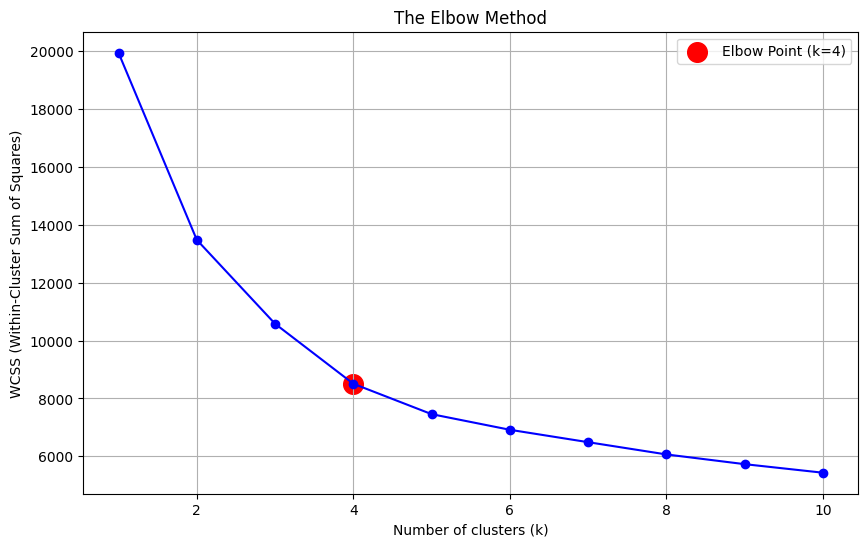

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Initializing the list for the values of WCSS

for i in range(1, 11):  # For different values of k ranging from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method with grid and highlighting the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.scatter(4, wcss[3], color='red', marker='o', s=200, label='Elbow Point (k=4)')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.legend()
plt.show()


By applying the elbow method, it can be concluded that the optimal number of clusters is achieved when k=4.

In [53]:
kmeans=KMeans(n_clusters=4, random_state=42).fit(df_rfm_scaled)
pred=kmeans.predict(df_rfm_scaled)

cluster = pred + 1
df1 = df.copy()
#df_rfm_scaled['cluster'] = cluster
y1 = cluster

In [54]:
import plotly.graph_objects as go

# Initialize the plot
PLOT = go.Figure()

# Iterate over clusters
for C in set(y1):
    cluster_data = df_rfm_scaled[y1 == C]

    # Add a trace for each cluster
    PLOT.add_trace(go.Scatter3d(
        x=cluster_data[:, 1],  # Adjust index as needed
        y=cluster_data[:, 4],  # Adjust index as needed
        z=cluster_data[:, 3],  # Adjust index as needed
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

# Update hover template
PLOT.update_traces(hovertemplate='Recency: %{x} <br>NumTotalPurchases: %{y} <br>Amount_Spent: %{z}')

# Update layout
PLOT.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    scene=dict(
        xaxis=dict(title='Recency', titlefont_color='black'),
        yaxis=dict(title='NumTotalPurchases', titlefont_color='black'),
        zaxis=dict(title='Amount_Spent', titlefont_color='black')
    ),
    font=dict(family="Gilroy", color='black', size=12)
)

# Show the plot
PLOT.show()

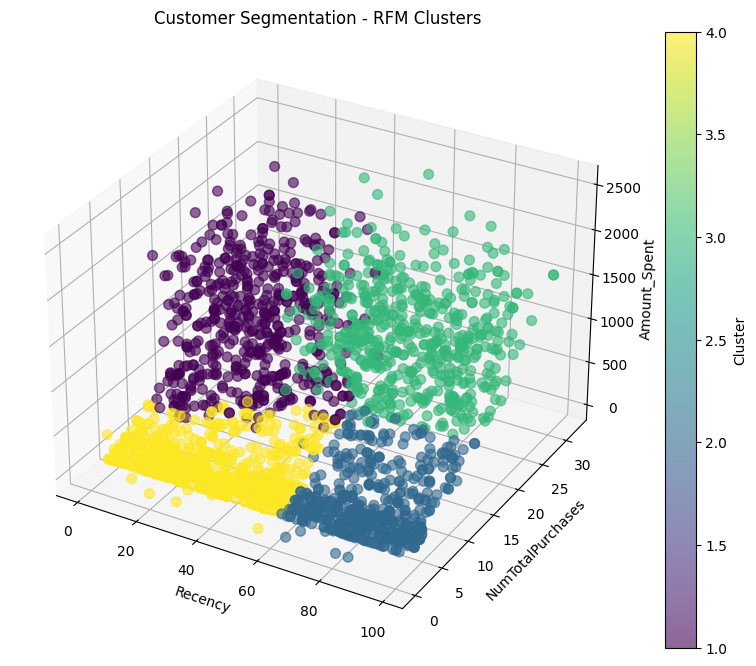

In [55]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_rfm['Recency'],
    df_rfm['NumTotalPurchases'],
    df_rfm['Amount_Spent'],
    c=y1,
    cmap='viridis',
    s=50,
    alpha=0.6
)

ax.set_xlabel('Recency')
ax.set_ylabel('NumTotalPurchases')
ax.set_zlabel('Amount_Spent')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.title('Customer Segmentation - RFM Clusters')
plt.show()


In [56]:
import plotly.graph_objects as go


# Initialize the plot
PLOT = go.Figure()

# Iterate over clusters
for C in set(y1):
    cluster_data = df_rfm_scaled[y1 == C]

    # Add a trace for each cluster
    PLOT.add_trace(go.Scatter(
        x=cluster_data[:, 1],  # Adjust index as needed
        y=cluster_data[:, 4],  # Adjust index as needed
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

# Update hover template
PLOT.update_traces(hovertemplate='Recency: %{x} <br>NumTotalPurchases: %{y}')

# Update layout
PLOT.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    xaxis=dict(title='Recency', titlefont_color='black'),
    yaxis=dict(title='NumTotalPurchases', titlefont_color='black'),
    font=dict(family="Gilroy", color='black', size=12)
)

# Show the plot
PLOT.show()


A discernible pattern emerges when opting for 4 clusters. Examining the plot between NumTotalPurchases and Recency reveals four distinct clusters:

* Low Recency & Low NumTotalPurchases
* High Recency & Low NumTotalPurchases
* Low Recency & High NumTotalPurchases
* High Recency & High NumTotalPurchases

In [57]:
import plotly.graph_objects as go


# Initialize the plot
PLOT = go.Figure()

# Iterate over clusters
for C in set(y1):
    cluster_data = df_rfm_scaled[y1 == C]

    # Add a trace for each cluster
    PLOT.add_trace(go.Scatter(
        x=cluster_data[:, 1],  # Adjust index as needed
        y=cluster_data[:, 3],  # Adjust index as needed
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

# Update hover template
PLOT.update_traces(hovertemplate='Recency: %{x} <br>Amount_Spent: %{y}')

# Update layout
PLOT.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    xaxis=dict(title='Recency', titlefont_color='black'),
    yaxis=dict(title='Amount_Spent', titlefont_color='black'),
    font=dict(family="Gilroy", color='black', size=12)
)

# Show the plot
PLOT.show()

Again, a noticeable pattern emerges when selecting for 4 clusters. Examining the plot between Amount_Spent and Recency reveals four distinct clusters:

* Low Recency & Low Amount_Spent
* High Recency & Low Amount_Spent
* Low Recency & High Amount_Spent
* High Recency & High Amount_Spent

In [58]:
import plotly.graph_objects as go

# Initialize the plot
PLOT = go.Figure()

# Iterate over clusters
for C in set(y1):
    cluster_data = df_rfm_scaled[y1 == C]

    # Add a trace for each cluster
    PLOT.add_trace(go.Scatter(
        x=cluster_data[:, 3],  # Adjust index as needed
        y=cluster_data[:, 4],  # Adjust index as needed
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

# Update hover template
PLOT.update_traces(hovertemplate='Amount_Spent: %{x} <br>NumTotalPurchases: %{y}')

# Update layout
PLOT.update_layout(
    width=800,
    height=800,
    autosize=True,
    showlegend=True,
    xaxis=dict(title='Amount_Spent', titlefont_color='black'),
    yaxis=dict(title='NumTotalPurchases', titlefont_color='black'),
    font=dict(family="Gilroy", color='black', size=12)
)

# Show the plot
PLOT.show()

In the depicted figure, no apparent pattern is discernible, except for the intuitive observation that as the Amount Spent increases, so does the number of total purchases.

### **Box Plot Analysis**

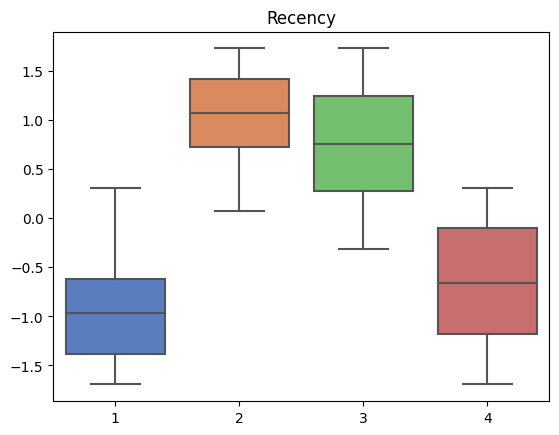

In [59]:
sns.boxplot(x = y1, y = df_rfm_scaled[:, 1], palette='muted')
plt.title('Recency')
plt.show()

Cluster 1 and 4 has the lowest amount of Recency, followed by cluster 3 and 2.

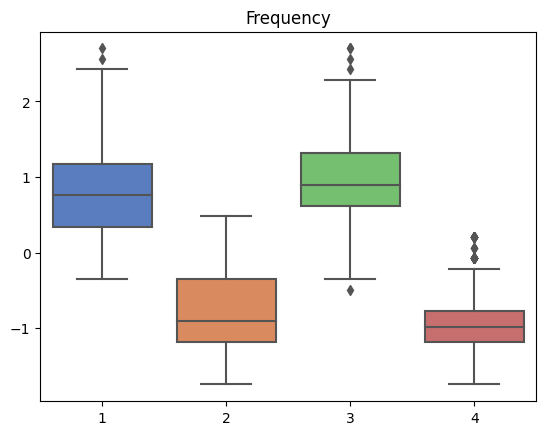

In [60]:
sns.boxplot(x = y1, y = df_rfm_scaled[:, 4], palette='muted')
plt.title('Frequency')
plt.show()

Cluster 3 and 1 has the highest amount of Frequency, followed by cluster 2 and then cluster 4.

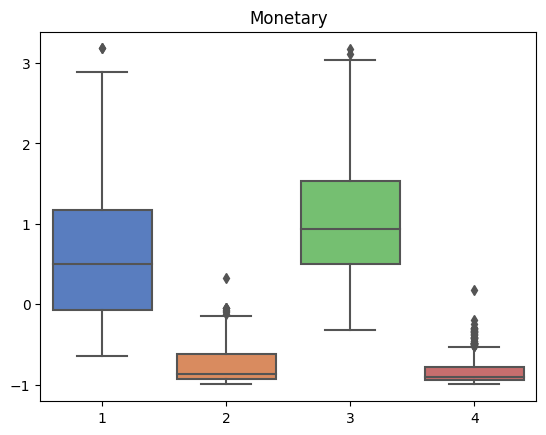

In [61]:
sns.boxplot(x = y1, y = df_rfm_scaled[:, 3], palette='muted')
plt.title('Monetary')
plt.show()

Cluster 3 and 1 has the highest amount of Monetary, followed by cluster 2 and then cluster 4.

Based on the preceding analysis, we can deduce the following cluster characteristics & categorization:

1. **Cluster 1** : **Potential Loyal Customers** (Low Recency, High Frequency, High Monetary)
2. **Cluster 2** : **Churning Customers** (High Recency, Low Frequency, Low Monetary)
3. **Cluster 3** : **Loyal Customers** (High Recency, High Frequency, High Monetary)
4. **Cluster 4** : **Inactive Customer** (Low Recency, Low Frequency, Low Monetary)

# **Customer Segmentation**

**Loyal Customers (High Recency & High Frequency):**

These customers have made recent purchases frequently. They are likely loyal to your brand and engaged with your products or services.

**Potential Loyal Customers (Low Recency & High Frequency):**

While these customers haven't made a purchase recently, they have a history of frequent purchases. They might be considered as potential loyal customers, and efforts can be made to re-engage them.

**Churning Customers (High Recency & Low Frequency):**

Customers in this group have made recent purchases, but their frequency is low. They might be at risk of churning, and strategies could be implemented to encourage more frequent transactions.

**Inactive Customers (Low Recency & Low Frequency):**

These customers haven't made a purchase recently, and their overall frequency is low. They are considered inactive, and targeted campaigns or incentives may be needed to rekindle their interest.

In [62]:
df_rfm['Segment'] = 'Inactive Customers'
df_rfm.loc[(df_rfm['Recency_Score'] <= 3) & (df_rfm['Frequency_Score'] >= 3), 'Segment'] = 'Potential Loyal Customers'
df_rfm.loc[(df_rfm['Recency_Score'] >= 3) & (df_rfm['Frequency_Score'] >= 3), 'Segment'] = 'Loyal Customers'
df_rfm.loc[(df_rfm['Recency_Score'] >= 3) & (df_rfm['Frequency_Score'] <= 3), 'Segment'] = 'Churning Customers'

# Display the distribution of customers in each segment
segment_counts = df_rfm['Segment'].value_counts()
print(segment_counts)

Churning Customers           809
Potential Loyal Customers    522
Loyal Customers              508
Inactive Customers           377
Name: Segment, dtype: int64


In [63]:
df_rfm

,ID,Recency,NumDealsPurchases,Amount_Spent,NumTotalPurchases,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,5524,58,3,1617,22,3,5,5,355,Loyal Customers
1,2174,38,2,27,4,4,1,1,411,Inactive Customers
2,4141,26,1,776,20,4,4,4,444,Potential Loyal Customers
3,6182,26,2,53,6,4,2,1,421,Inactive Customers
4,5324,94,5,422,14,1,3,3,133,Churning Customers
...,...,...,...,...,...,...,...,...,...,...
2235,10870,46,2,1341,16,3,4,5,345,Loyal Customers
2236,4001,56,7,444,15,3,3,3,333,Churning Customers
2237,7270,91,1,1241,18,1,4,5,145,Loyal Customers
2238,8235,8,2,843,21,5,5,4,554,Potential Loyal Customers


In [64]:
df['Segment'] = df_rfm['Segment']

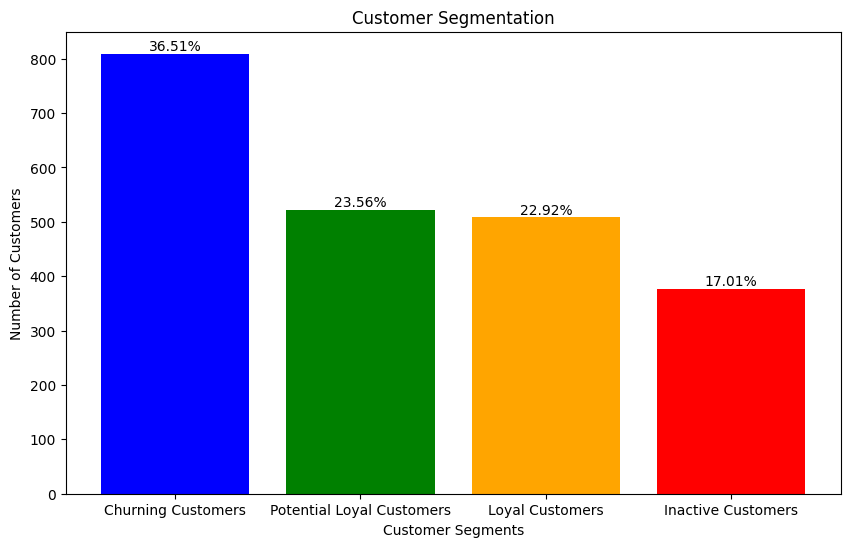

In [65]:
import matplotlib.pyplot as plt

segment_counts = df_rfm['Segment'].value_counts()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
bars = ax.bar(segment_counts.index, segment_counts.values, color=['blue', 'green', 'orange', 'red'])

# Adding percentage labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{(yval / len(df_rfm)) * 100:.2f}%', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Customer Segments')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Segmentation')

# Display the plot
plt.show()

The graph above illustrates the following distribution:

* Churning Customers: 36.51%
* Potential Loyal Customers: 23.56%
* Loyal Customers: 22.92%
* Inactive Customers: 17.01%

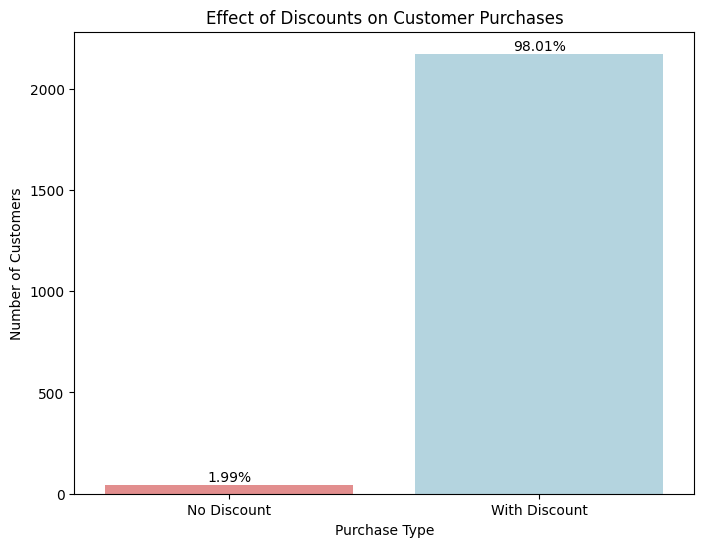

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'MadePurchaseWithDiscount' to categorize customers based on whether they made a purchase with a discount
df_rfm['MadePurchaseWithDiscount'] = df_rfm['NumDealsPurchases'] > 0

# Count the number of customers who made purchases with and without discounts
discount_counts = df_rfm['MadePurchaseWithDiscount'].value_counts()

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bars
bars = sns.barplot(x=discount_counts.index, y=discount_counts.values, palette=['lightcoral', 'lightblue'])

# Adding percentage labels on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{(yval / len(df_rfm)) * 100:.2f}%', ha='center', va='bottom')

# Adding labels and title
ax.set_xticklabels(['No Discount', 'With Discount'])
ax.set_xlabel('Purchase Type')
ax.set_ylabel('Number of Customers')
ax.set_title('Effect of Discounts on Customer Purchases')

# Display the plot
plt.show()


The visual representation above provides a clear insight into the purchasing patterns of customers. Notably, 98.01% of customers opted to make their purchases with the benefit of a discount, indicating a significant majority engaging with discounted offerings. Conversely, a smaller fraction, constituting 1.99% of customers, made purchases without availing any discounts. This observation underscores the prevalent influence and appeal of discount-oriented strategies in attracting a substantial portion of the customer base.

In [67]:
df_rfm['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  6,  9,  0,  8, 10, 13, 11, 12])

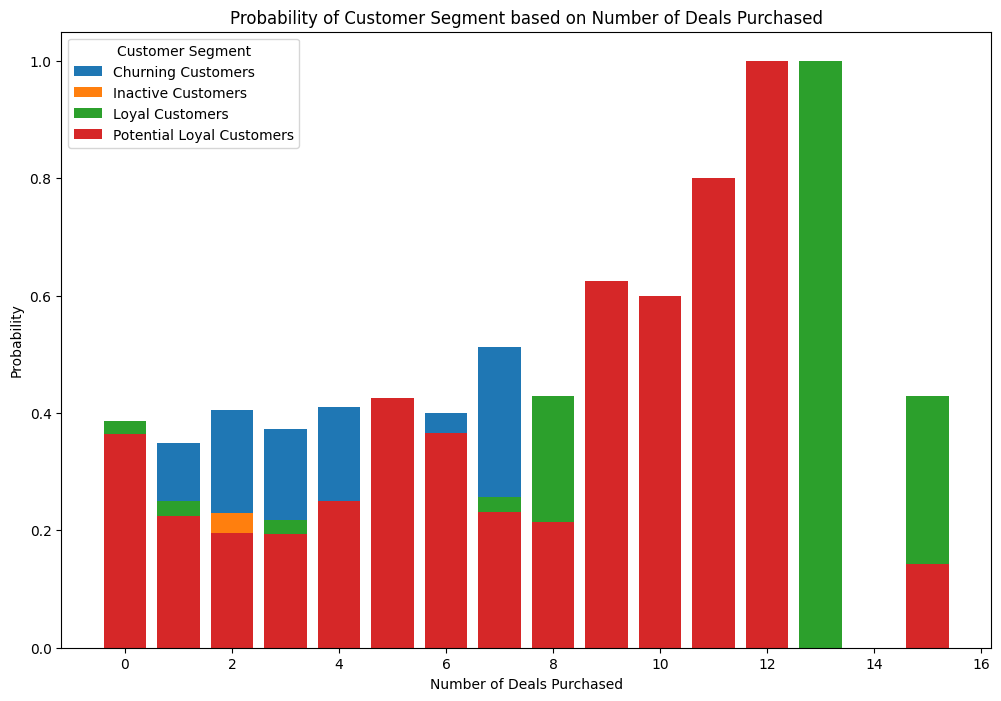

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the probability of each segment for different discount counts
discount_prob_df = df_rfm.groupby('NumDealsPurchases')['Segment'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for each segment
for segment in discount_prob_df.columns:
    ax.bar(discount_prob_df.index, discount_prob_df[segment], label=segment)

# Adding labels and title
ax.set_xlabel('Number of Deals Purchased')
ax.set_ylabel('Probability')
ax.set_title('Probability of Customer Segment based on Number of Deals Purchased')

# Adding legend
ax.legend(title='Customer Segment', loc='upper left')

# Display the plot
plt.show()

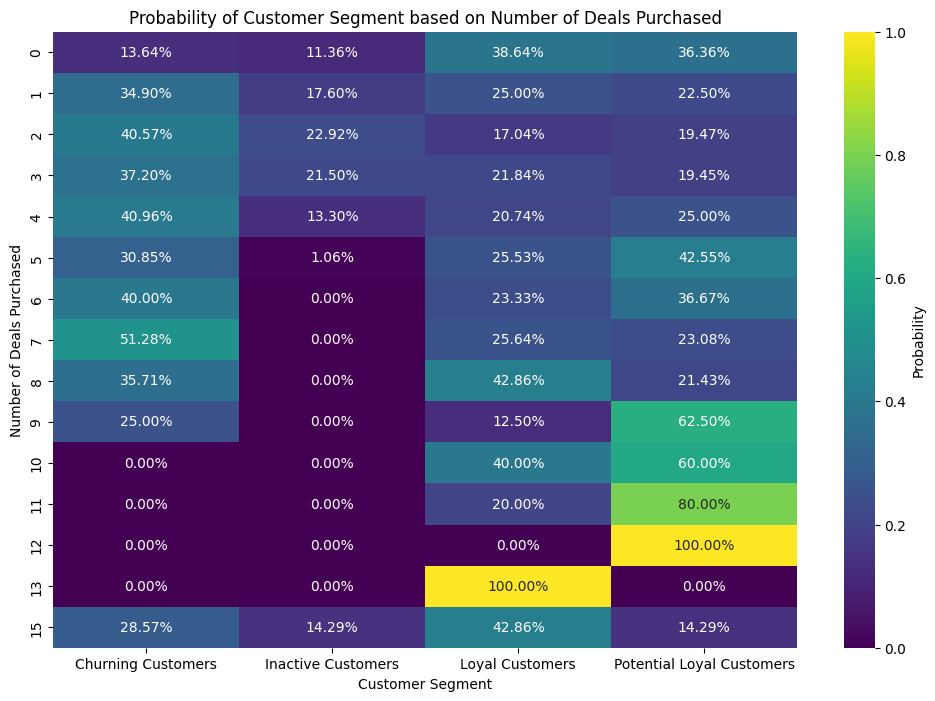

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store the probability of each segment for different discount counts
discount_prob_df = df_rfm.groupby('NumDealsPurchases')['Segment'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(discount_prob_df, annot=True, cmap='viridis', fmt=".2%", cbar_kws={'label': 'Probability'})
plt.title('Probability of Customer Segment based on Number of Deals Purchased')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Deals Purchased')
plt.show()

The above observations, reveals that Loyal and Potential Loyal Customers tend to make purchases regardless of the deals offered, indicating a certain level of loyalty. However, it's noteworthy that even these customer segments exhibit a tendency towards making deal purchases. Notably, the highest number of deals, specifically 15, attracted Inactive customers, suggesting a particular responsiveness to this specific offer by this segment. In contrast, Churning customers show a higher inclination towards making purchases when deals are presented.

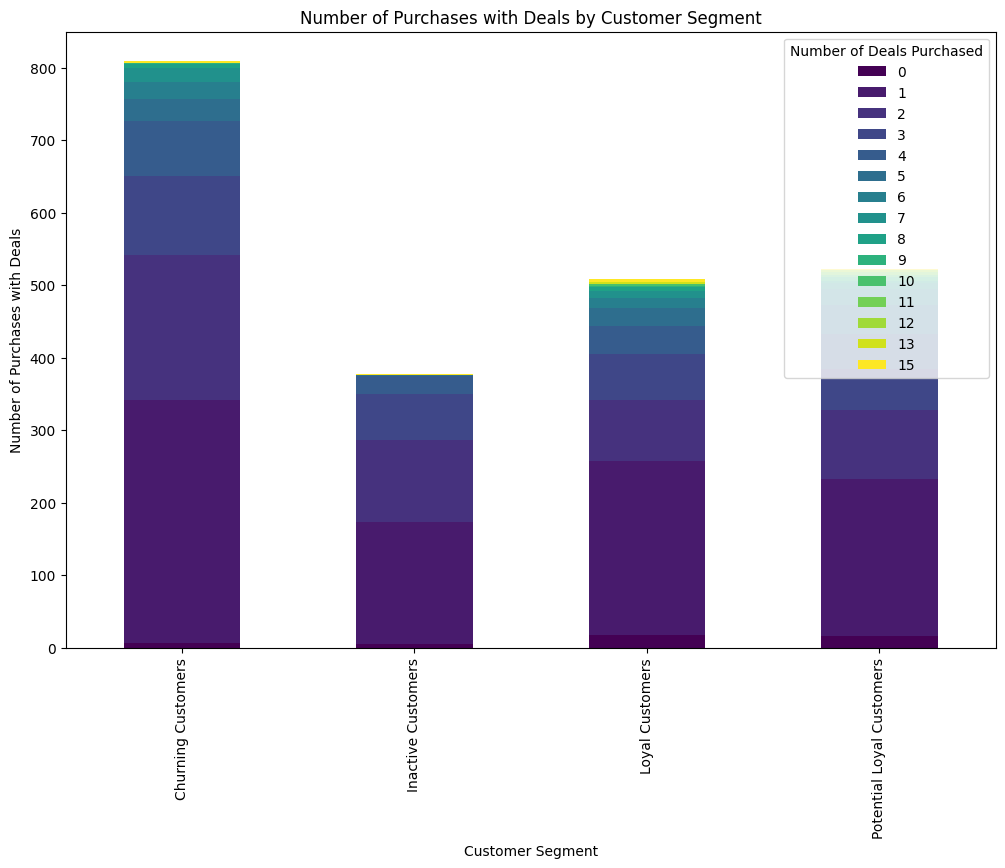

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the number of purchases with deals for each segment
deals_by_segment = df_rfm.groupby('Segment')['NumDealsPurchases'].value_counts().unstack().fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for each segment
deals_by_segment.plot(kind='bar', stacked=True, ax=ax, cmap='viridis')

# Adding labels and title
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Number of Purchases with Deals')
ax.set_title('Number of Purchases with Deals by Customer Segment')

# Adding legend
ax.legend(title='Number of Deals Purchased', loc='upper right')

# Display the plot
plt.show()

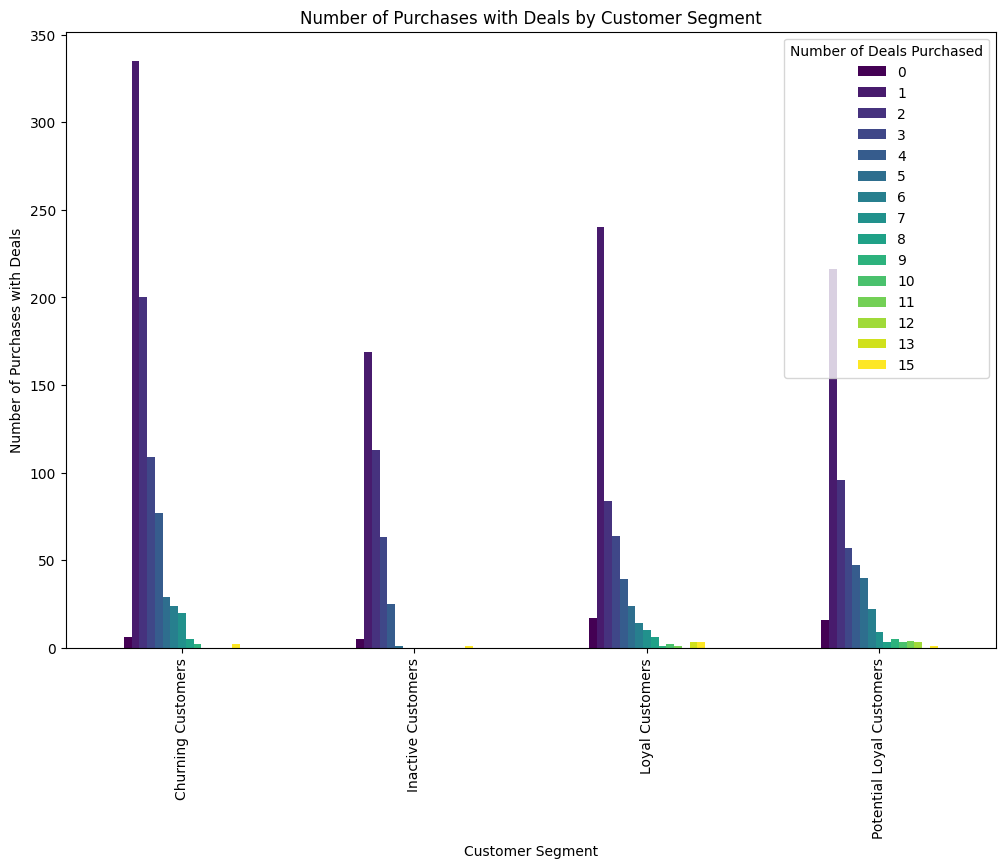

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the number of purchases with deals for each segment
deals_by_segment = df_rfm.groupby('Segment')['NumDealsPurchases'].value_counts().unstack().fillna(0)

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bars for each segment
deals_by_segment.plot(kind='bar', ax=ax, cmap='viridis')

# Adding labels and title
ax.set_xlabel('Customer Segment')
ax.set_ylabel('Number of Purchases with Deals')
ax.set_title('Number of Purchases with Deals by Customer Segment')

# Adding legend
ax.legend(title='Number of Deals Purchased', loc='upper right')

# Display the plot
plt.show()

It is evident that Churning Customers have made the most purchases with deals, showcasing a high engagement with promotional offers. Loyal Customers and Potential Loyal Customers, on the other hand, have made a relatively similar number of deal purchases. Interestingly, even Inactive Customers, while making fewer purchases, have demonstrated some interest in the number of deals offered, indicating a modest level of responsiveness.

# **Customer Categories:**

**Churning Customers:**

Churning customers, who are at risk of discontinuing their engagement with the business, have made the most purchases with deals. This may suggest that discounts play a role in retaining these customers or encouraging additional purchases.

**Loyal and Potential Loyal Customers:**

Both loyal and potential loyal customers have made a similar number of purchases with deals. This finding indicates that deals are not only attractive to potential loyal customers but also continue to be appreciated by customers who are already loyal to the brand.

**Inactive Customers:**

Inactive customers, who have made the least number of purchases overall, also show the least engagement with deals. This aligns with the general trend of low activity among inactive customers.

# **Possible Implications:**

**Churning Customer Retention Strategies:**

Since churning customers are responsive to deals, targeted retention strategies with specific discount offers or promotions might be effective in re-engaging them.

**Loyalty Program Optimization:**

Loyal and potential loyal customers' consistent usage of deals may highlight opportunities to optimize loyalty programs with tailored promotions.

**Inactive Customer Reactivation:**

For inactive customers, a different approach may be needed to reactivate their interest, as they are less responsive to deals. Exploring personalized and targeted reactivation campaigns could be beneficial.

In [72]:
df.head(6)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Children,Customer_For_Months,Amount_Spent,TotalAcceptedCmp,NumTotalPurchases,Segment
1,2,4,46344.0,38,2,5,0,0,69,2,4,27,0,4,Inactive Customers
2,2,5,71613.0,26,1,4,0,0,58,0,15,776,0,20,Potential Loyal Customers
3,2,5,26646.0,26,2,6,0,0,39,1,2,53,0,6,Inactive Customers
4,4,3,58293.0,94,5,5,0,0,42,1,10,422,0,14,Churning Customers
5,3,5,62513.0,16,2,6,0,0,56,1,15,716,0,20,Potential Loyal Customers
6,2,2,55635.0,34,4,6,0,0,52,1,25,590,0,17,Potential Loyal Customers


In [73]:
order = ['Loyal Customers', 'Potential Loyal Customers', 'Churning Customers', 'Inactive Customers']

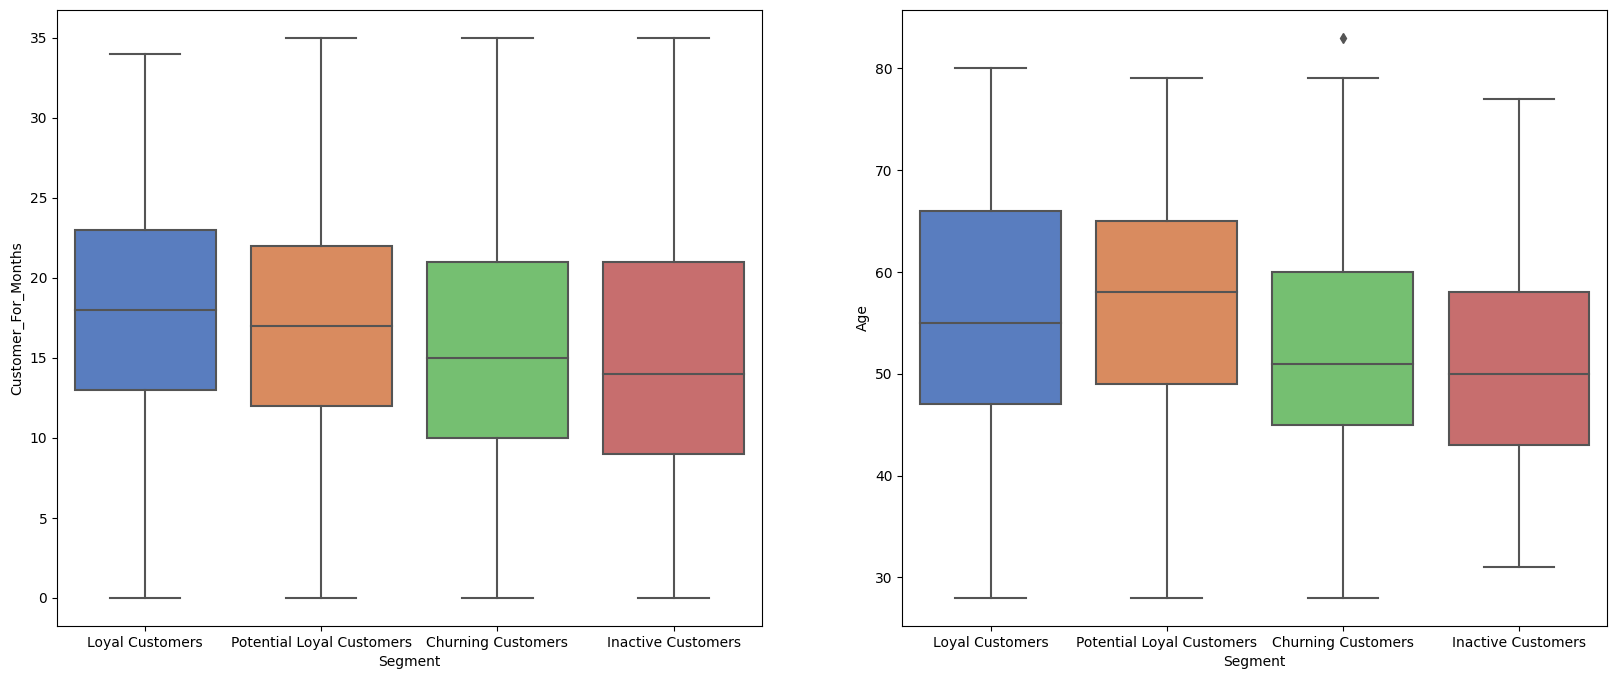

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(ax=axes[0], x='Segment', y='Customer_For_Months', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1], x='Segment', y='Age', data=df, palette='muted', order=order)
plt.show()

Customer_For_Months vs Clusters:
It's notable that Loyal and Potential Loyal Customers exhibit the longest membership duration, suggesting a strong sense of loyalty to the business.

Age vs Clusters:
Observing the age distribution, Loyal and Potential Loyal Customers are the oldest, further confirming their long-term engagement with the business.

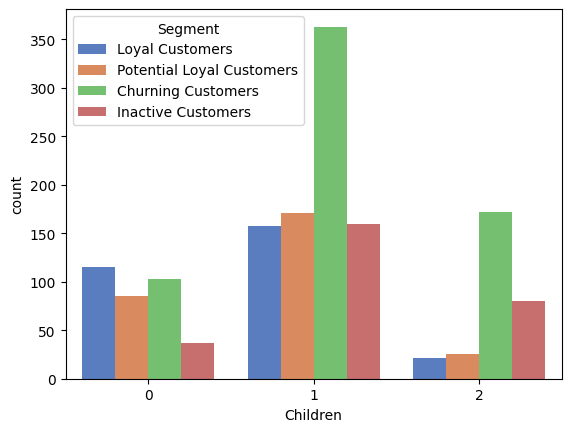

In [75]:
sns.countplot(x='Children', hue='Segment', data=df, palette='muted', hue_order=order)
plt.show()

It is apparent that a significant proportion of Churning Customers have either one or two children. Considering this pattern, implementing targeted strategies related to children may prove effective in capturing their interest and engagement.

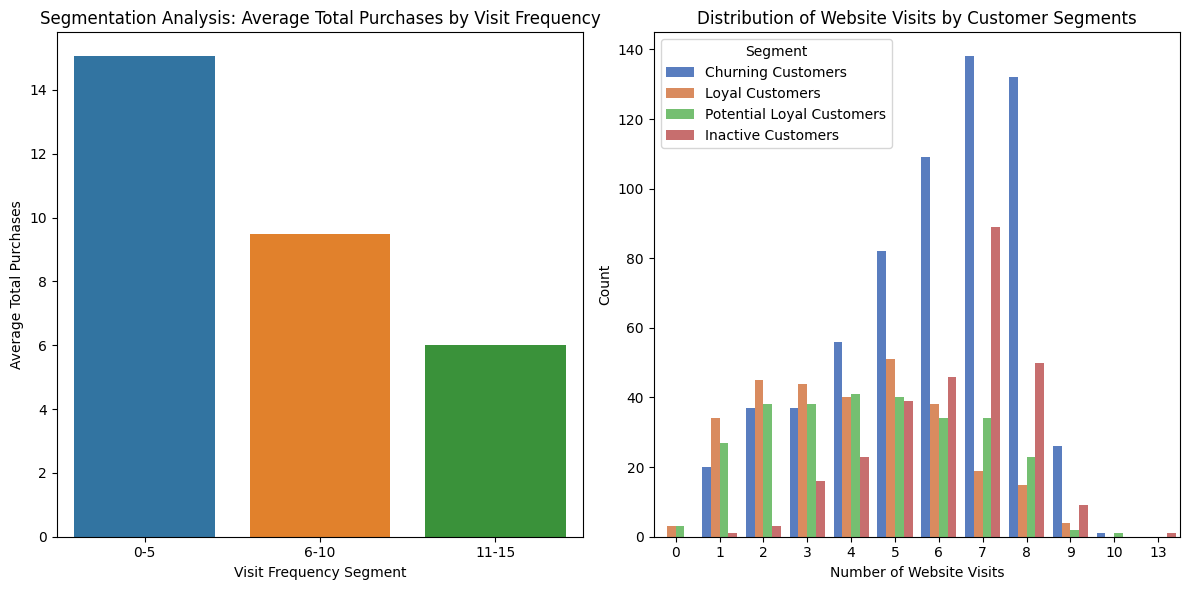

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define segmentation bins based on the frequency of website visits
bins = [0, 5, 10, float('inf')]
labels = ['0-5', '6-10', '11-15']

# Create a new column 'VisitFrequencySegment' based on the bins
df['VisitFrequencySegment'] = pd.cut(df['NumWebVisitsMonth'], bins=bins, labels=labels, right=False)

# Explore the segments by plotting the average total purchases in each segment
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='VisitFrequencySegment', y='NumTotalPurchases', data=df, ci=None)
plt.title('Segmentation Analysis: Average Total Purchases by Visit Frequency')
plt.xlabel('Visit Frequency Segment')
plt.ylabel('Average Total Purchases')

# Explore the distribution of website visits based on customer segments
plt.subplot(1, 2, 2)
order = ['Churning Customers', 'Loyal Customers', 'Potential Loyal Customers', 'Inactive Customers']
sns.countplot(x='NumWebVisitsMonth', hue='Segment', data=df, palette='muted', hue_order=order)
plt.title('Distribution of Website Visits by Customer Segments')
plt.xlabel('Number of Website Visits')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


- Significantly, both Churning Customers and Inactive Customers exhibit higher visit frequency on the company's website. Despite this, their lower purchase activity suggests a potential opportunity for improvement in enhancing the website's overall appeal and engagement.
- An interesting trend emerges from the data – as the number of visits to the website increases, the total purchase decreases. Conversely, a higher number of purchases correlates with fewer website visits. This observation may indicate potential issues with the website that could be explored and addressed to optimize the customer experience and drive higher conversions.

**Potential Action**:

- Customer Engagement Initiatives: Implement initiatives to engage customers with a higher visit frequency in a way that encourages increased purchases. This could include personalized recommendations, exclusive offers, or loyalty programs.

- Feedback and Surveys: Gather feedback from customers in each segment to understand their motivations, preferences, and challenges. This qualitative data can provide valuable insights.

In [77]:
col_del = ["VisitFrequencySegment"]
df=df.drop(columns=col_del,axis=1)

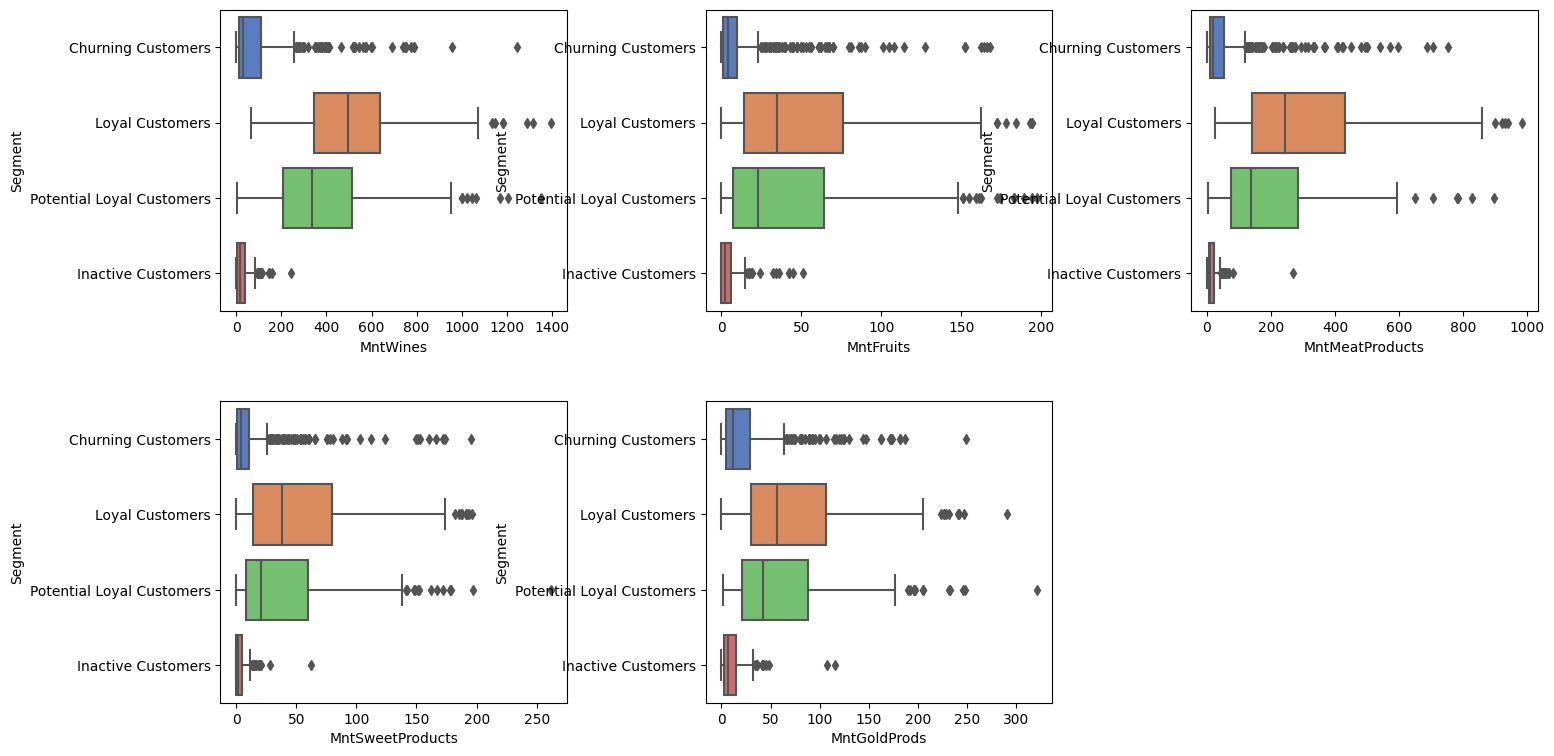

Total wine purchase : 676083
Total fruit purchase : 58405
Total meat purchase : 370063
Total sweet purchase : 59896
Total gold purchase : 97427


In [78]:
fig, axes = plt.subplots(2, 3, figsize=(17, 9))
df['MntWines'] = df3['MntWines']
df['MntFruits'] = df3['MntFruits']
df['MntMeatProducts'] = df3['MntMeatProducts']
df['MntSweetProducts'] = df3['MntSweetProducts']
df['MntGoldProds'] = df3['MntGoldProds']
sns.boxplot(ax=axes[0, 0], x='MntWines', y='Segment', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[0, 1], x='MntFruits', y='Segment', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[0, 2], x='MntMeatProducts', y='Segment', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1, 0], x='MntSweetProducts', y='Segment', data=df, palette='muted', order=order)
sns.boxplot(ax=axes[1, 1], x='MntGoldProds', y='Segment', data=df, palette='muted', order=order)
axes[1, 2].axis('off')
plt.subplots_adjust(hspace=0.3, wspace=0.4)
plt.show()

print("Total wine purchase :" , df3['MntWines'].sum())
print("Total fruit purchase :" , df3['MntFruits'].sum())
print("Total meat purchase :" , df3['MntMeatProducts'].sum())
print("Total sweet purchase :" , df3['MntSweetProducts'].sum())
print("Total gold purchase :" , df3['MntGoldProds'].sum())

* The most popular product is Wines followed by Meat Products and Gold Products.
* Loyal and Potential Loyal Customers buy a lot of wine.

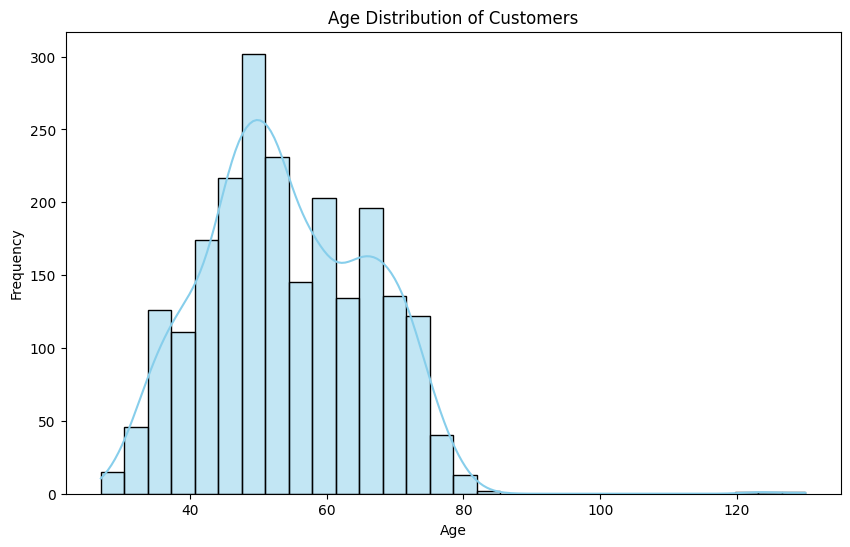

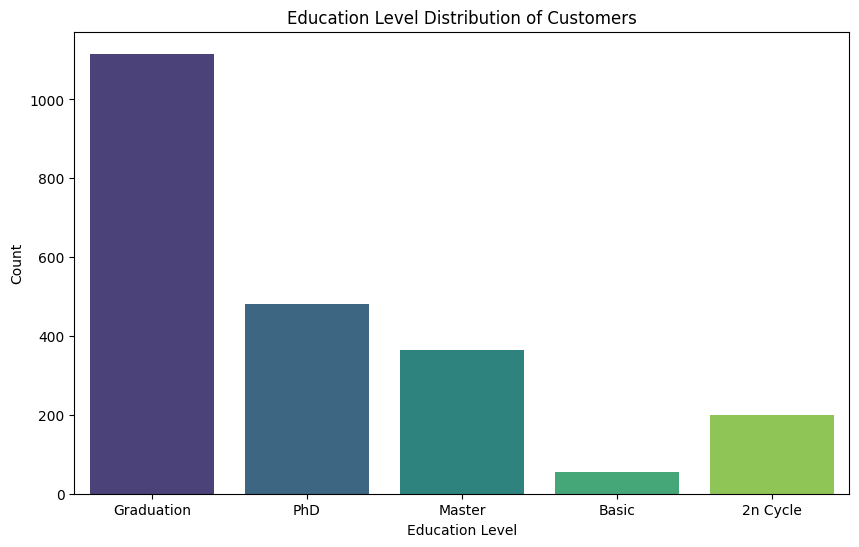

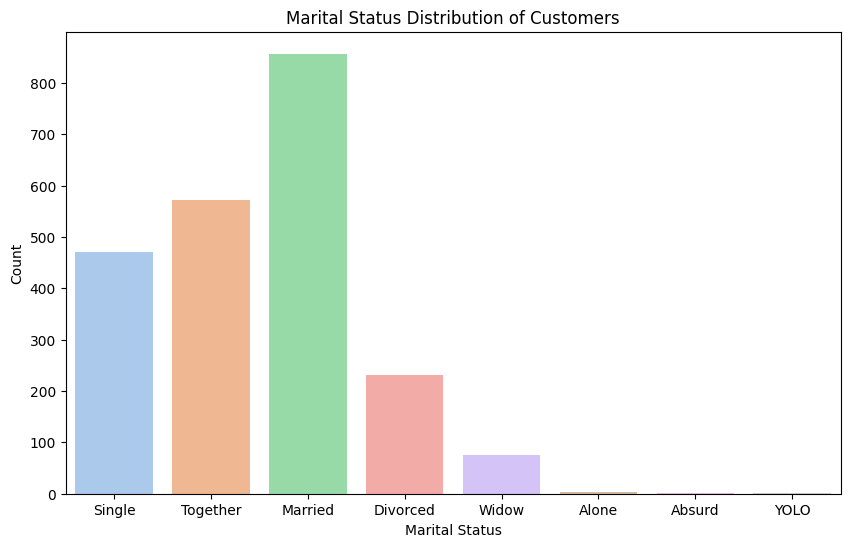

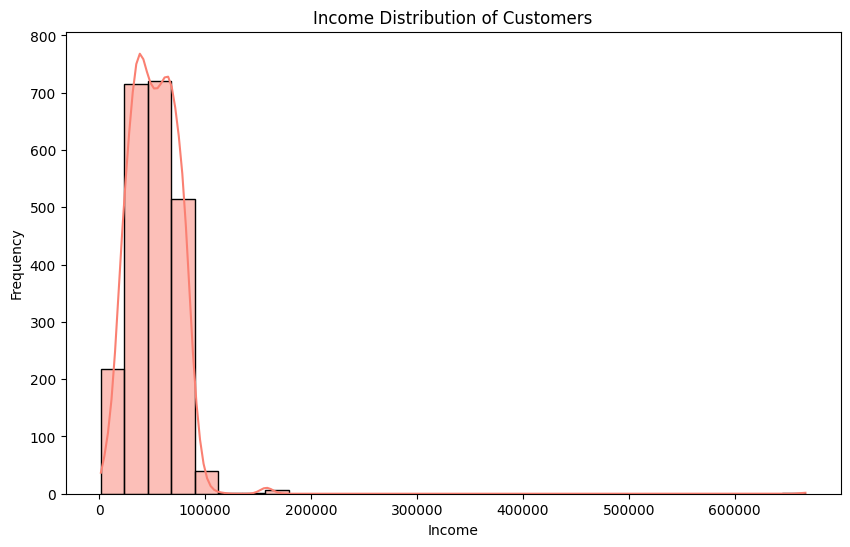

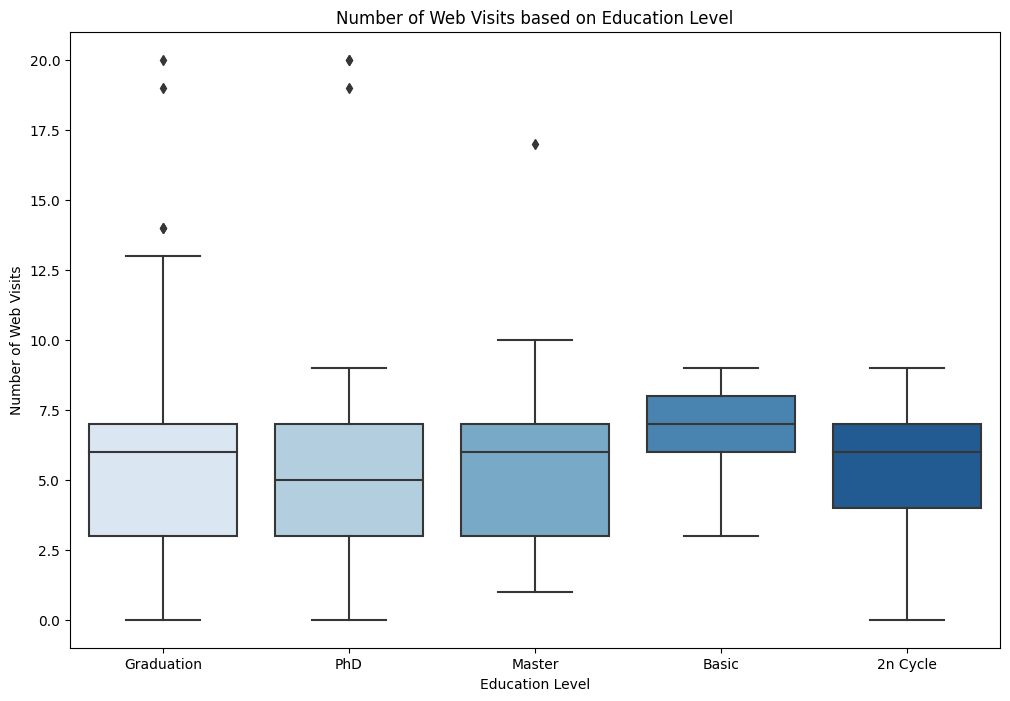

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df2, palette='viridis')
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Visualize marital status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df2, palette='pastel')
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Visualize income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2['Income'], bins=30, kde=True, color='salmon')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize number of web visits based on education level
plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='NumWebVisitsMonth', data=df2, palette='Blues')
plt.title('Number of Web Visits based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Web Visits')
plt.show()

# **Classification**

In [80]:
df_SVC = df.copy()

In [81]:
from sklearn.model_selection import train_test_split

y = df['Segment']# Target variable
X = df.drop('Segment', axis=1)  # Features

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

model = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest strategy

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, predictions))

Accuracy: 0.92
                           precision    recall  f1-score   support

       Churning Customers       0.96      0.93      0.95       131
       Inactive Customers       0.91      0.96      0.93        67
          Loyal Customers       0.82      0.94      0.87        48
Potential Loyal Customers       0.96      0.85      0.90        52

                 accuracy                           0.92       298
                macro avg       0.91      0.92      0.91       298
             weighted avg       0.93      0.92      0.92       298




The accuracy achieved with the simple One-vs-Rest (OvR) strategy is 92%.

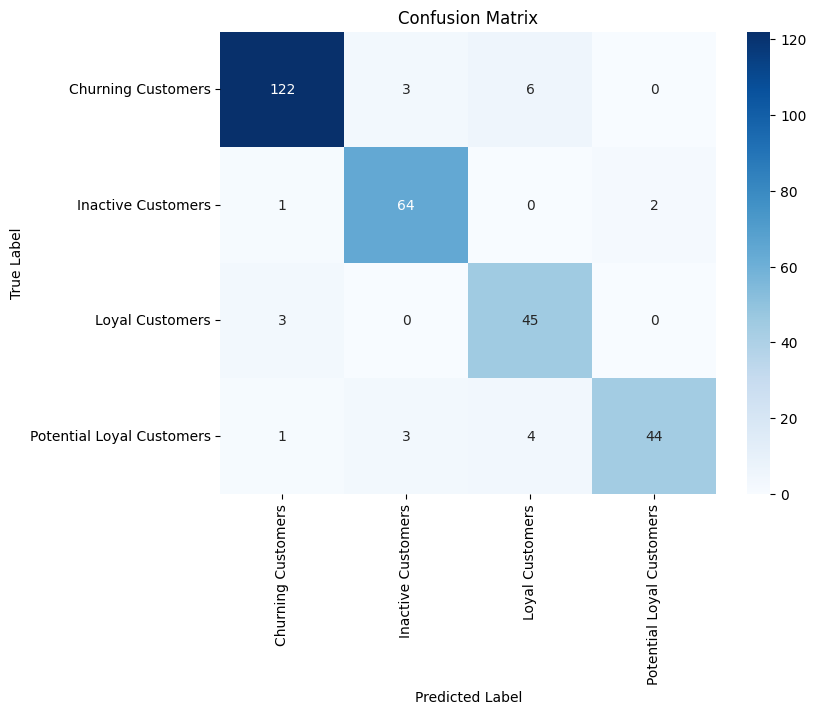

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- The first row corresponds to "Churning Customers," indicating that 122 instances were correctly classified as such, 3 were misclassified as "Inactive Customers," 6 as "Loyal Customers," and none as "Potential Loyal Customers".

- The second row represents "Inactive Customers," with 64 instances correctly classified, 1 misclassified as "Churning Customers," 2 as "Potential Loyal Customers," and none as "Loyal Customers".

- The third row is for "Loyal Customers," showing 45 correct classifications, 3 misclassifications as "Churning Customers," none as "Inactive Customers," and none as "Potential Loyal Customers".

- The fourth row pertains to "Potential Loyal Customers," with 44 instances correctly classified, 1 misclassified as "Churning Customers," 3 as "Inactive Customers," and 4 as "Loyal Customers".

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest strategy

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, predictions))

Accuracy: 0.96
                           precision    recall  f1-score   support

       Churning Customers       0.96      0.98      0.97       131
       Inactive Customers       0.96      0.97      0.96        67
          Loyal Customers       0.98      0.88      0.92        48
Potential Loyal Customers       0.94      0.98      0.96        52

                 accuracy                           0.96       298
                macro avg       0.96      0.95      0.95       298
             weighted avg       0.96      0.96      0.96       298



The accuracy has increased to 96% with the utilization of scaled features.

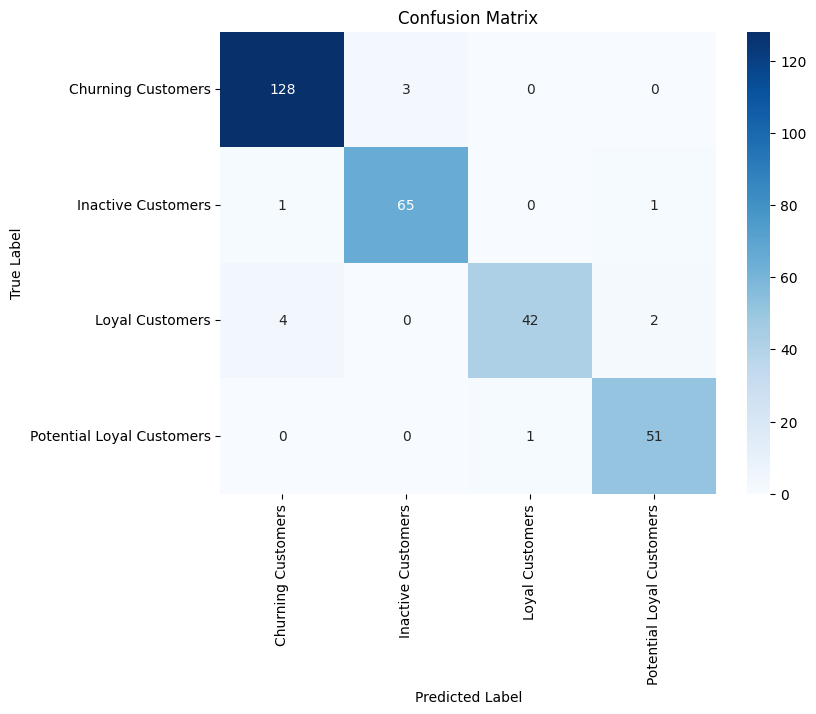

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix provides a detailed breakdown of the model's performance for each customer segment. Notably, the majority of instances are correctly classified, contributing to the overall improved accuracy. For instance, the model correctly identifies 128 instances of "Churning Customers," 65 instances of "Inactive Customers," 42 instances of "Loyal Customers," and 51 instances of "Potential Loyal Customers." The small number of misclassifications underscores the effectiveness of the scaled features in enhancing the model's precision and overall predictive capabilities.

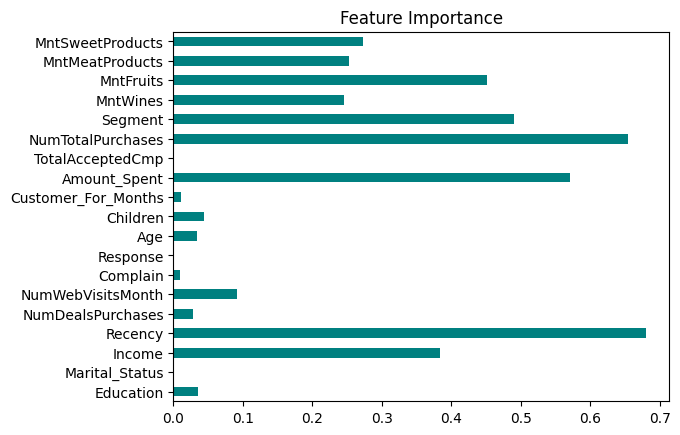

In [86]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, df_SVC.columns[0:len(df_SVC.columns)-1])
feat_importances.plot(kind='barh',color='teal')
plt.title('Feature Importance')
plt.show()


The features 'TotalAcceptedCmp', 'Response', 'NumDealsPurchases', 'Marital_Status', and 'Education' exhibit lower importance, as they have a comparatively minor impact on the categories. Hence, we can consider dropping these columns.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

svc_model = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest strategy

# Use Recursive Feature Elimination (RFE) for feature selection
rfe = RFE(estimator=svc_model, n_features_to_select=15, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train the model on the training data with selected features
svc_model.fit(X_train_rfe, y_train)

# Make predictions on the test data with selected features
predictions = svc_model.predict(X_test_rfe)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, predictions))


Accuracy: 0.99
                           precision    recall  f1-score   support

       Churning Customers       0.99      0.98      0.99       131
       Inactive Customers       0.97      1.00      0.99        67
          Loyal Customers       1.00      0.96      0.98        48
Potential Loyal Customers       0.98      1.00      0.99        52

                 accuracy                           0.99       298
                macro avg       0.99      0.99      0.99       298
             weighted avg       0.99      0.99      0.99       298



With the inclusion of important features, the updated accuracy has significantly improved to 99%.

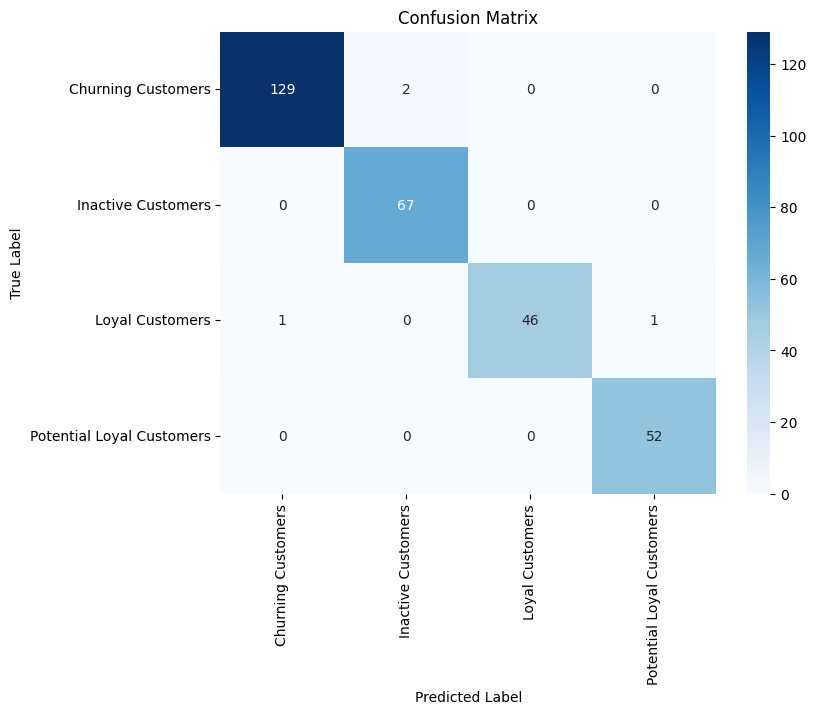

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The updated confusion matrix illustrates the model's improved performance, showcasing a minimal number of misclassifications across customer segments. In this refined classification, Churning Customers, Inactive Customers, Loyal Customers, and Potential Loyal Customers are accurately distinguished, underlining the robust predictive capabilities of the model. This heightened accuracy is a positive outcome, indicating the efficacy of leveraging essential features for precise customer segmentation and classification.

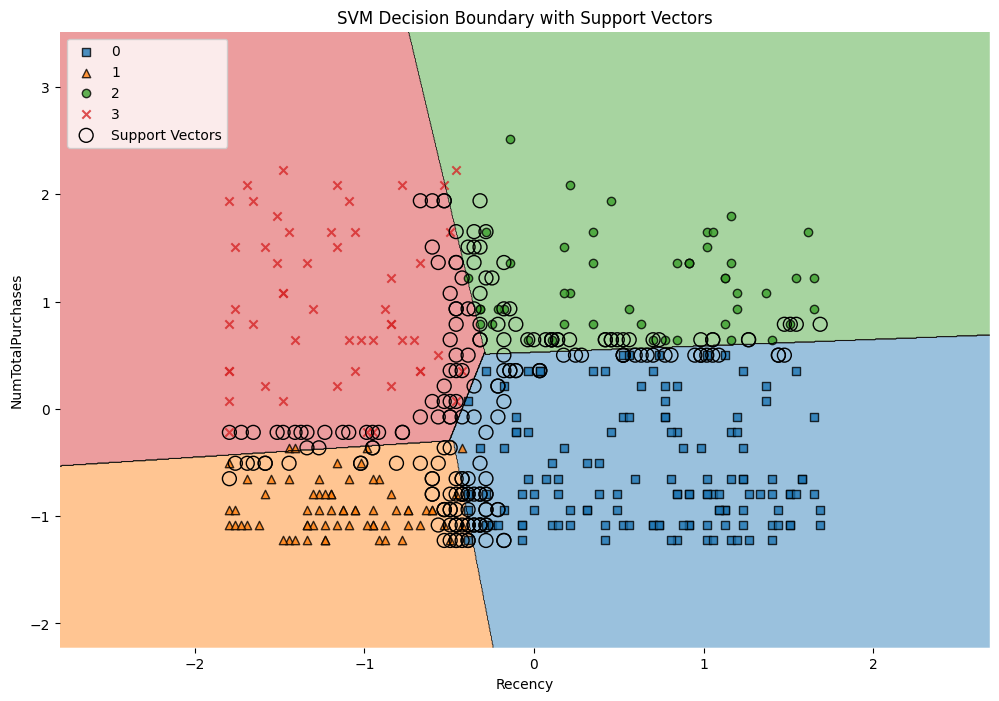

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming df_SVC is your DataFrame
y = df_SVC['Segment']
X = df_SVC.drop('Segment', axis=1)  # Features

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SVM model
svc_model = SVC(kernel='linear')
# Use only features at positions 3 and 13
features_to_use = [3, 13]
svc_model.fit(X_train_scaled[:, features_to_use], y_train)
plt.figure(figsize=(12, 8))
# Plot decision boundary and support vectors
plot_decision_regions(X_test_scaled[:, features_to_use], y_test, clf=svc_model, legend=2)

# Plot support vectors
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel(f'Recency')
plt.ylabel(f'NumTotalPurchases')
plt.legend(loc='upper left')
plt.show()




- 0 - Churning Customers
- 1 - Inactive Customers
- 2 - Loyal Customers
- 3 - Potential Loyal Customers


The SVM decision boundary plot illustrates the relationship between Recency and NumTotalPurchases. The data is distinctly separated into four categories, and the circled points represent the support vectors that play a crucial role in determining the classification boundary.

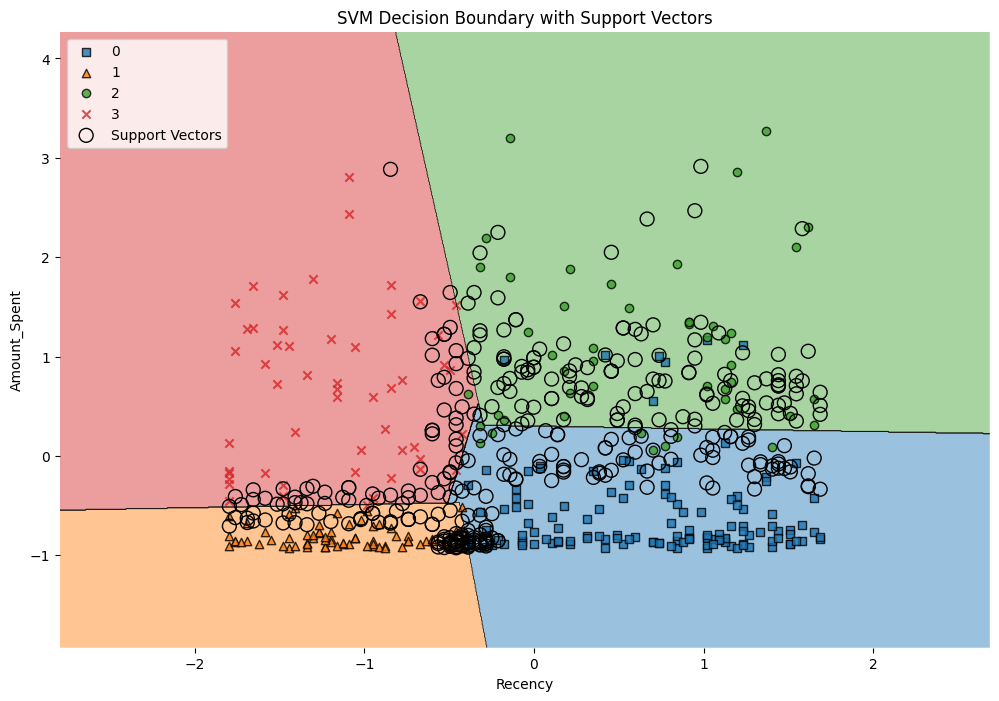

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a SVM model
svc_model = SVC(kernel='linear')
# Use only features at positions 3 and 11
features_to_use = [3, 11]
svc_model.fit(X_train_scaled[:, features_to_use], y_train)
plt.figure(figsize=(12, 8))
# Plot decision boundary and support vectors
plot_decision_regions(X_test_scaled[:, features_to_use], y_test, clf=svc_model, legend=2)

# Plot support vectors
plt.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')

plt.title('SVM Decision Boundary with Support Vectors')
plt.xlabel(f'Recency')
plt.ylabel(f'Amount_Spent')
plt.legend(loc='upper left')
plt.show()


- 0 - Churning Customers
- 1 - Inactive Customers
- 2 - Loyal Customers
- 3 - Potential Loyal Customers


The SVM decision boundary plot depicts the connection between Recency and Amount_Spent. The data is clearly divided into four categories, with circled points denoting the support vectors that significantly influence the classification boundary.